## Q1. Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q2.import csv file Diwali Sales Data.csv

In [2]:
# diwali_sales_data = pd.read_csv("Diwali_Sales_Data(1).csv", encoding='ISO-8859-1')
diwali_sales_data = pd.read_csv("Diwali_Sales_Data.csv")
df = diwali_sales_data

## Q3. Find the shape of the data

In [3]:
df.shape

(11251, 15)

## Q4. Fetch the first five rows of the dataset

In [4]:
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN       NaN  
3  23912.0     NaN       NaN  
4  23877.0     NaN       NaN

## Q5. Get the complete info of the dataset

In [5]:
df.info

<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [6]:
# df.isnull().sum()
df = df.drop(columns=["Status","unnamed1"])
# df.describe

## Q7. Check for null values and find which columns have null values

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [8]:
# df['Age'].describe()
# df['Age'].
df.describe()[['Age','Orders','Amount']].iloc[1]
# type(df.describe())
# df.describe()

Age         35.421207
Orders       2.489290
Amount    9453.610858
Name: mean, dtype: float64

## Q9. Plot a bar chart for Gender and it's count 

In [9]:
df['Gender'].describe()
# df['Gender'].info()
# df['Gender'].head()

count     11251
unique        2
top           F
freq       7842
Name: Gender, dtype: object

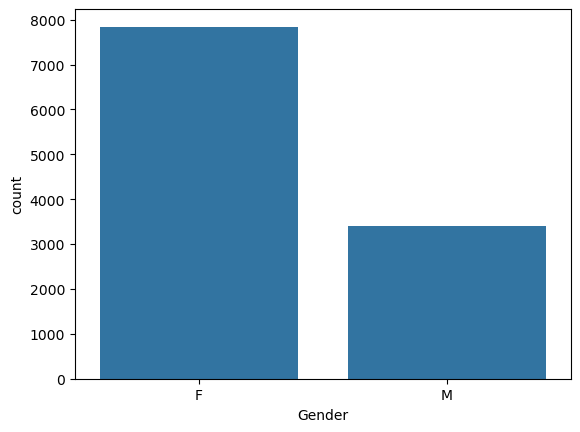

In [10]:
# plt.bar(x=['M','F'], data=df['Gender'],height=1.0)
# plt.bar(x='Gender', data=df)
sns.countplot(x='Gender',data=df)
plt.show()

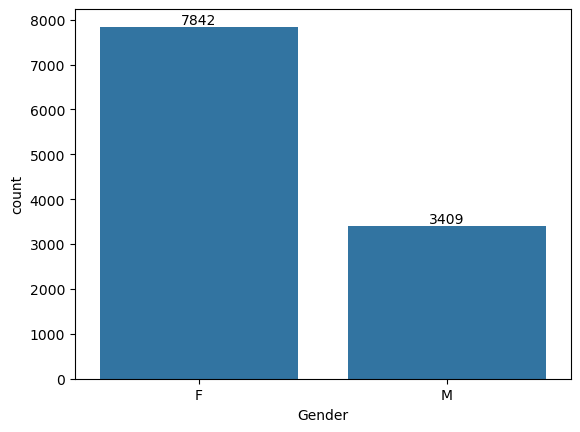

In [11]:
ax = sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

## Q10. Plot a bar chart for gender vs total amount 

In [12]:
df['Amount'].describe ()

count    11239.000000
mean      9453.610858
std       5222.355869
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

<BarContainer object of 2 artists>

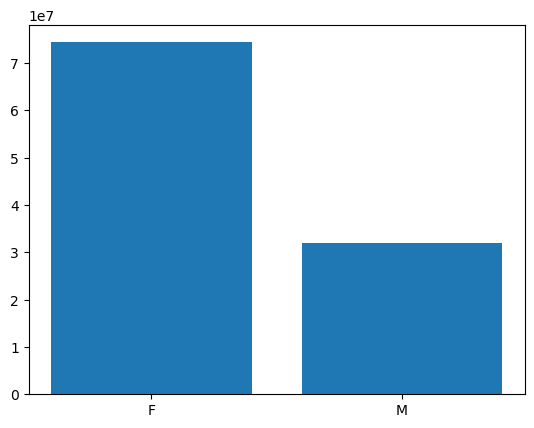

In [13]:
counts = [df[df['Gender'] == 'F']['Amount'].sum(),df[df['Gender'] == 'M']['Amount'].sum()]
classes = ('F','M')
plt.bar(classes,counts)

In [15]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

Gender       Amount
0      F  74335856.43
1      M  31913276.00

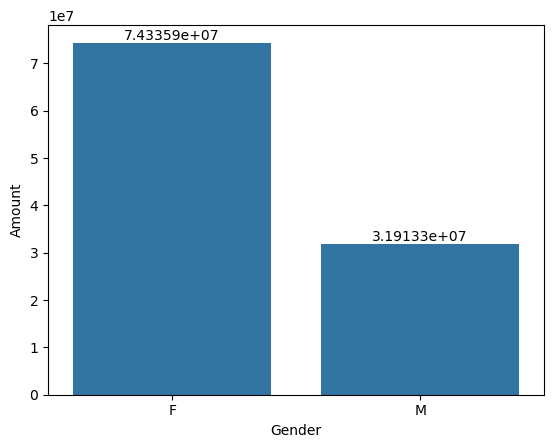

In [19]:
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen)

for bars in ax.containers:
    ax.bar_label(bars)

## Q11. Plot the countplot for Age Group with hue and Gender

<Axes: xlabel='Age Group', ylabel='count'>

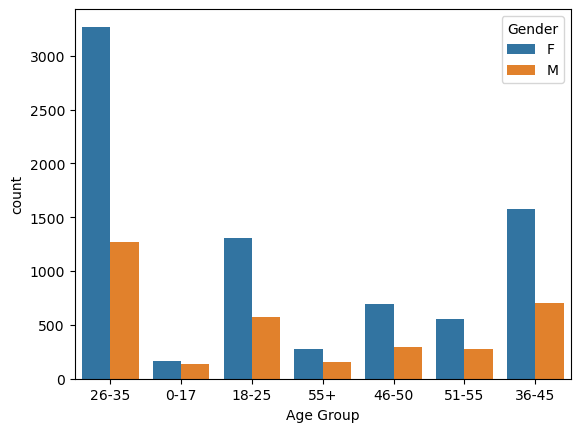

In [14]:
sns.countplot(data=df, x='Age Group', hue='Gender')

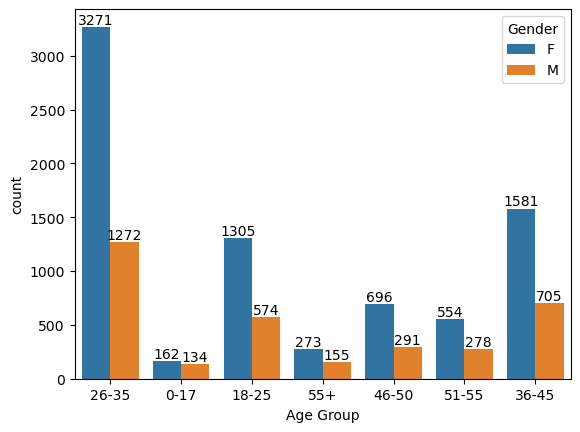

In [17]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

## Q12. Draw the plot for total number of orders from top 10 states 

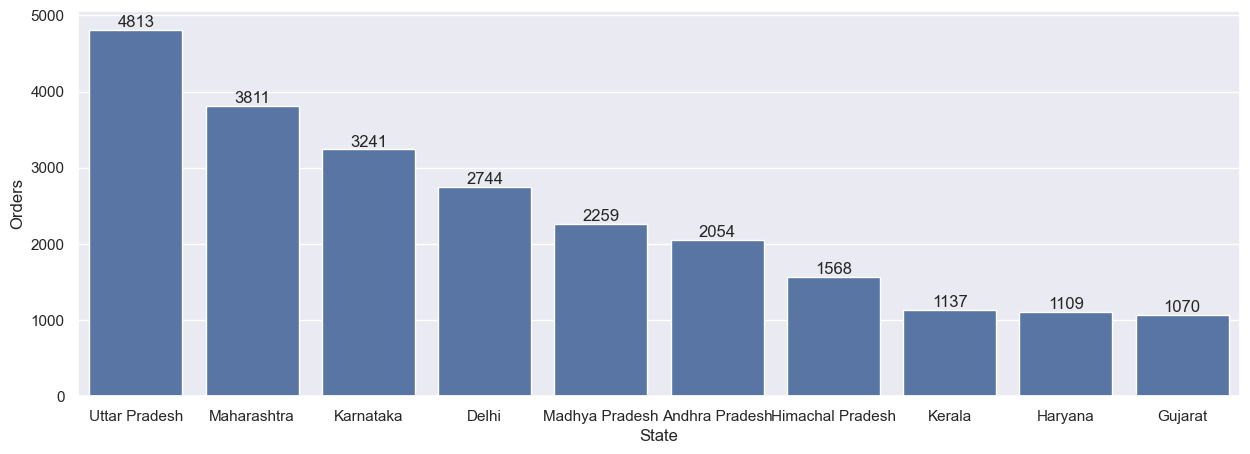

In [24]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = sales_state, x = 'State', y = 'Orders')

for bars in ax.containers:
    ax.bar_label(bars)

## Q13.Draw the plot to plot total amount/sales from top 10 states

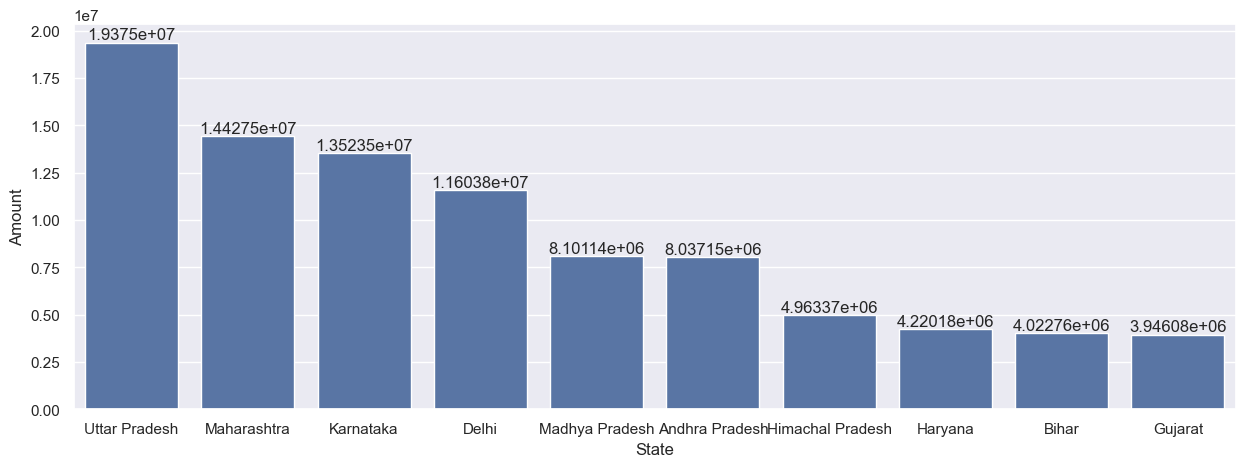

In [25]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = sales_state, x = 'State', y = 'Amount')

for bars in ax.containers:
    ax.bar_label(bars)

## Q14. Draw the plot to show the marital status 

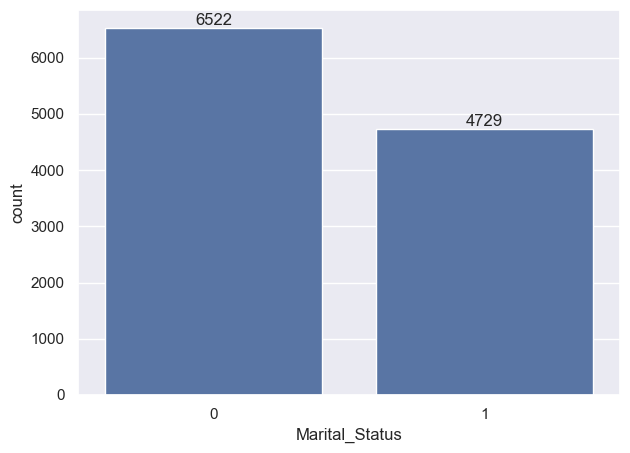

In [27]:
ax = sns.countplot(data=df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

## Q15. Draw the plot to show the top 10 occupations

In [29]:
for column in df.columns:
    print(column)

User_ID
Cust_name
Product_ID
Gender
Age Group
Age
Marital_Status
State
Zone
Occupation
Product_Category
Orders
Amount


In [ ]:
sales_occupation = df.groupby(['Occupation']

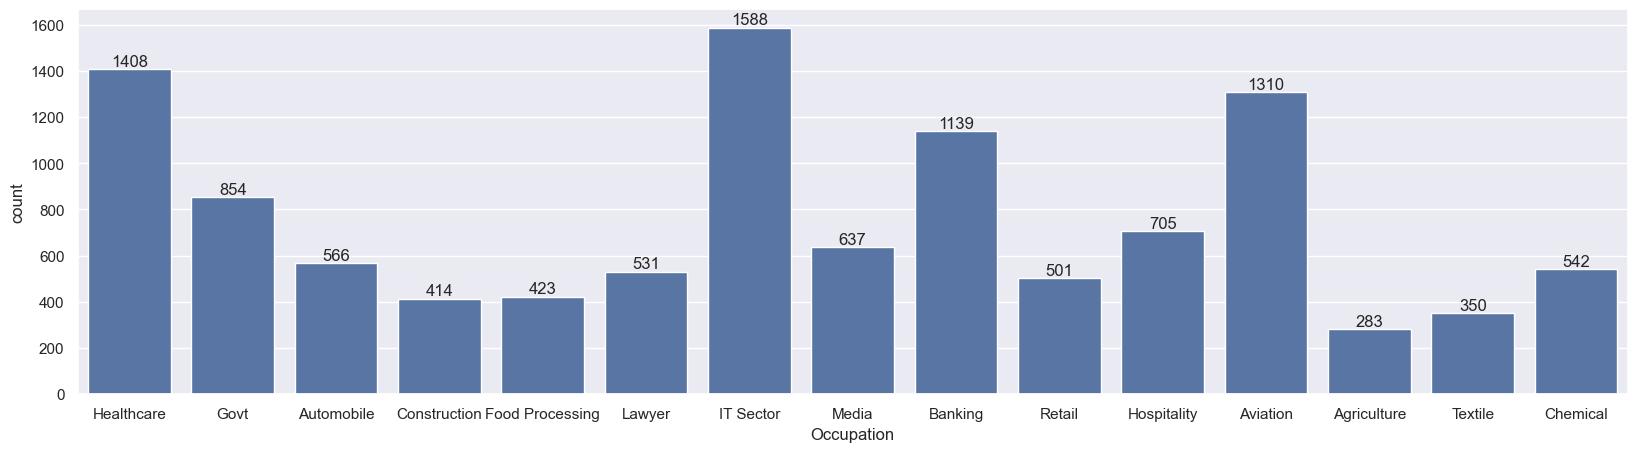

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

## Q16. Draw the countplot to print the top 10 categories 

## Q17. What is the prodct ID of the top 10 most sold products.

## Q18. What conclusion you can draw from the above visualizations. 